In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
data = 'data/cleaned_data.parquet'

In [4]:
df = pd.read_parquet(data)

In [5]:
df

,Title,Artist,ConstituentID,BeginDate,EndDate,Medium,CreditLine,AccessionNumber,Classification,Department,DateAcquired,Cataloged,ObjectID,URL,ThumbnailURL,Height (cm),Width (cm),Nationality,Gender
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,1841-01-01,1918-01-01,Ink and cut-and-pasted painted pages on paper,Fractional and promised gift of Jo Carole and ...,885.1996,Architecture,Architecture & Design,1996-04-09,Y,2,http://www.moma.org/collection/works/2,http://www.moma.org/media/W1siZiIsIjUyNzc3MCJd...,48.6000,168.9000,Austrian,Male
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,1944-01-01,1927-01-01,Paint and colored pencil on print,Gift of the architect in honor of Lily Auchinc...,1.1995,Architecture,Architecture & Design,1995-01-17,Y,3,http://www.moma.org/collection/works/3,http://www.moma.org/media/W1siZiIsIjUyNzM3NCJd...,40.6401,29.8451,French,Male
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,1876-01-01,1957-01-01,"Graphite, pen, color pencil, ink, and gouache ...",Gift of Jo Carole and Ronald S. Lauder,1.1997,Architecture,Architecture & Design,1997-01-15,Y,4,http://www.moma.org/collection/works/4,http://www.moma.org/media/W1siZiIsIjUyNzM3NSJd...,34.3000,31.8000,Austrian,Male
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,1944-01-01,1927-01-01,Photographic reproduction with colored synthet...,Purchase and partial gift of the architect in ...,2.1995,Architecture,Architecture & Design,1995-01-17,Y,5,http://www.moma.org/collection/works/5,http://www.moma.org/media/W1siZiIsIjUyNzQ3NCJd...,50.8000,50.8000,American,Male
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,1876-01-01,1957-01-01,"Graphite, color pencil, ink, and gouache on tr...",Gift of Jo Carole and Ronald S. Lauder,2.1997,Architecture,Architecture & Design,1997-01-15,Y,6,http://www.moma.org/collection/works/6,http://www.moma.org/media/W1siZiIsIjUyNzQ3NSJd...,38.4000,19.1000,Austrian,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139627,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.30,Drawing,Drawings & Prints,2020-12-09,N,440436,Unavailable,Unavailable,30.8000,22.5000,American,Male
139628,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.31,Drawing,Drawings & Prints,2020-12-09,N,440437,Unavailable,Unavailable,30.8000,22.5000,American,Male
139629,"Page from Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,Page from a spiral-bound sketchbook with penci...,Gift of Jack Shear,346.2020.32,Drawing,Drawings & Prints,2020-12-09,N,440438,Unavailable,Unavailable,30.8000,22.5000,American,Male
139630,"Front cover of Sketchbook #24, New York City",Ellsworth Kelly,3048,1923-01-01,2015-01-01,"Spiral-bound sketchbook with pencil, ballpoint...",Gift of Jack Shear,346.2020.1,Drawing,Drawings & Prints,2020-12-09,N,440439,Unavailable,Unavailable,30.8000,22.5000,American,Male


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')

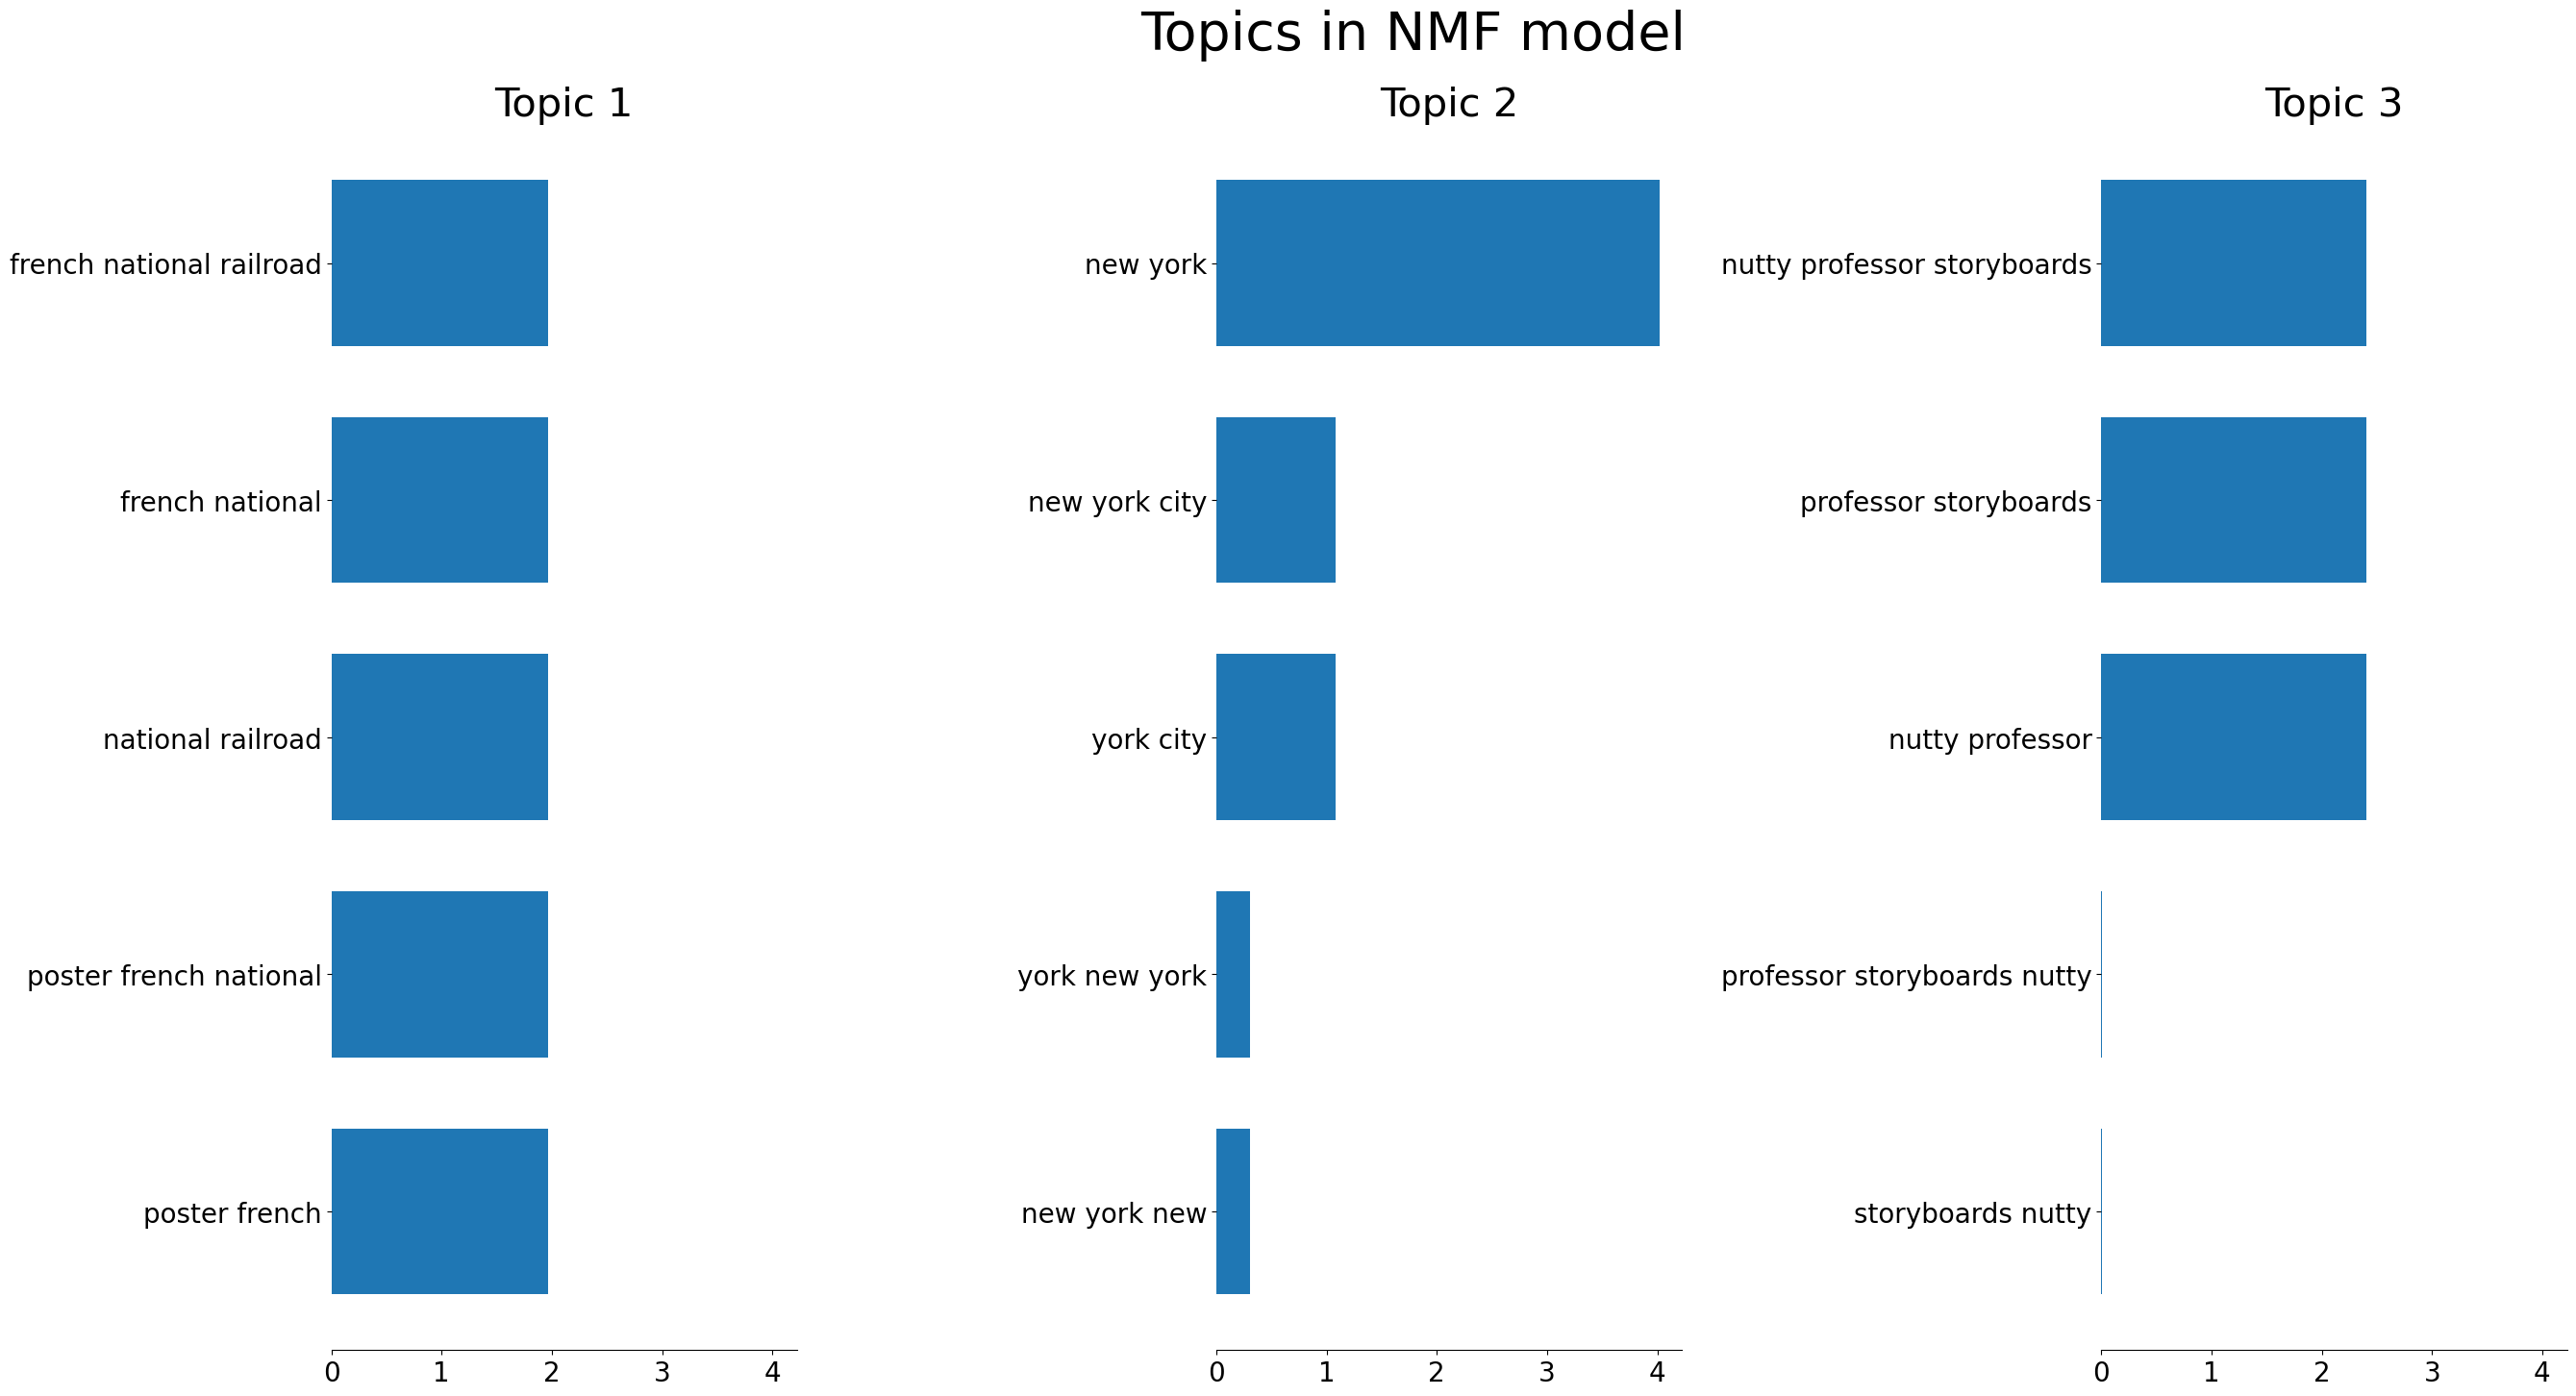

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline

# Create a TF-IDF vectorizer object
# TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to quantify a word in documents
# It is used to reflect how important a word is to a document in a collection or corpus
# The stop_words parameter is used to ignore common words in English such as 'this', 'is', etc.
# The ngram_range parameter is used to specify the size of word chunks to consider as features
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords_list, ngram_range=(2,3))

# Create an NMF (Non-Negative Matrix Factorization) object
# The n_components parameter is used to specify the number of topics to extract
nmf = NMF(n_components=3)

# Create a pipeline object that sequentially applies the TF-IDF vectorizer and NMF
pipe = make_pipeline(tfidf_vectorizer, nmf)

# Fit the pipeline to the Title data
pipe.fit(df['Title'])

def plot_top_words(model, feature_names, n_top_words, title):
    """
    Plot top words in topics 
    """
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Plot the top words in the topics identified by the NMF model
plot_top_words(
    nmf, tfidf_vectorizer.get_feature_names_out(), 5, "Topics in NMF model"
)